In [86]:
import pandas as pd
dataset=pd.read_csv('IXIC.csv').values
open_value=dataset[:,1]
open_value=open_value.reshape(-1,1)
print(open_value[:5])
print(open_value.shape)

[[100.0]
 [100.839996]
 [100.760002]
 [100.690002]
 [101.449997]]
(12787, 1)


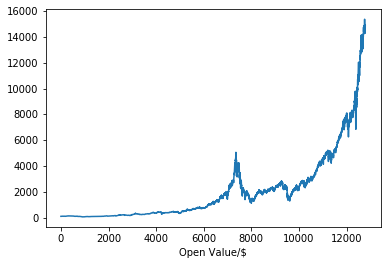

In [87]:
from matplotlib import pyplot as plt

plt.plot(open_value)
plt.xlabel('Date')
plt.xlabel('Open Value/$')
plt.show()

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_open_value=scaler.fit_transform(open_value)
print(open_value[:5])
print(scaled_open_value[:5])

[[100.0]
 [100.839996]
 [100.760002]
 [100.690002]
 [101.449997]]
[[0.00294561]
 [0.00300044]
 [0.00299521]
 [0.00299065]
 [0.00304025]]


In [90]:
data=[]
target=[]

for i in range(50,open_value.shape[0]):
    #print((scaled_open_value[i]-scaled_open_value[i-50])/scaled_open_value[i])
    data1=(scaled_open_value[i]-scaled_open_value[i-50])/scaled_open_value[i]
    data2=(scaled_open_value[i+50]-scaled_open_value[i])/scaled_open_value[i+50]
    data.append((scaled_open_value[i]-scaled_open_value[i-50])/scaled_open_value[i])

    target.append(scaled_open_value[i])
    

C:\Users\Ayodhya\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\Ayodhya\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Ayodhya\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


IndexError: index 12787 is out of bounds for axis 0 with size 12787

In [91]:
data=[]
target=[]
data1=[]
for i in range(50,open_value.shape[0]):
    #print((scaled_open_value[i]-scaled_open_value[i-50])/scaled_open_value[i])
    data1.append((scaled_open_value[i]-scaled_open_value[i-50])/scaled_open_value[i])
    #print(data)

    #data.append(data1:data2)
    #target.append(scaled_open_value[i])
size=len(data1)
print(size)    

12737


C:\Users\Ayodhya\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


In [92]:
df = pd.DataFrame(data1)
df1=df.values
ope=df1[:,0]
ope=ope.reshape(-1,1)

In [93]:
ope
ope.shape

(12737, 1)

In [94]:
df

,0
0,0.174351
1,0.158829
2,0.167453
3,0.179147
4,0.172058
...,...
12732,-0.005231
12733,-0.015155
12734,-0.012209
12735,-0.002026


In [95]:
df.shape[0]

12737

In [96]:
data_new=[]
target_new=[]

for i in range(50,df.shape[0]):
   
    #print(scaled_open_value[i-50:i])
    data_new.append(ope[i-50:i])
    #print(data)
    target_new.append(ope[i])
    
len(data_new)

12687

In [97]:
import numpy as np
data_np=np.array(data_new)
target_np=np.array(target_new)

print(data_np.shape)
print(target_np.shape)

(12687, 50, 1)
(12687, 1)


In [98]:
np.save('data_IXIC_open_value',data_np)
np.save('target_IXIC_open_value',target_np)

In [1]:
import numpy as np
data_train=np.load('data_IXIC_open_value.npy')
target_train=np.load('target_IXIC_open_value.npy')
print(data_train.shape)
print(target_train.shape)

(12687, 50, 1)
(12687, 1)


In [2]:
train_data=data_train[:8000]
train_target=target_train[:8000]

test_data=data_train[8000:]
test_target=target_train[8000:]

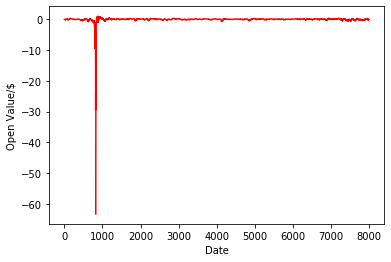

In [3]:
from matplotlib import pyplot as plt

#test_x_range is an array of values between 8000-12687
test_x_range=np.arange(8000,12687,1)

plt.plot(train_target,'r',label='train')
#plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [4]:
#data_train.shape
data_train

array([[[ 0.17435051],
        [ 0.15882894],
        [ 0.16745276],
        ...,
        [-0.06055338],
        [-0.06804967],
        [-0.05616051]],

       [[ 0.15882894],
        [ 0.16745276],
        [ 0.17914725],
        ...,
        [-0.06804967],
        [-0.05616051],
        [-0.0326846 ]],

       [[ 0.16745276],
        [ 0.17914725],
        [ 0.17205831],
        ...,
        [-0.05616051],
        [-0.0326846 ],
        [-0.01958948]],

       ...,

       [[ 0.07488852],
        [ 0.08099459],
        [ 0.07276781],
        ...,
        [-0.00522206],
        [-0.00523082],
        [-0.0151551 ]],

       [[ 0.08099459],
        [ 0.07276781],
        [ 0.079023  ],
        ...,
        [-0.00523082],
        [-0.0151551 ],
        [-0.01220941]],

       [[ 0.07276781],
        [ 0.079023  ],
        [ 0.07520966],
        ...,
        [-0.0151551 ],
        [-0.01220941],
        [-0.00202624]]])

In [6]:
from keras.models import Input,Sequential,Model
from keras.layers import Bidirectional,Dense,Dropout,Flatten
from keras.layers import Activation,MaxPooling1D
from keras.layers.convolutional import Conv1D
from keras import optimizers
from keras.layers import Concatenate
#input_shape=data_train.shape[1:]

parallel_kernels= {} 
parallel_kernels[0]= [5,None]
parallel_kernels[1]= [5,None]
parallel_kernels[2]= [5,None]
layers=[]
inp=Input(shape=(None,50,1))
for k in range(0,len(parallel_kernels)):
    
    modelconvoone=Conv1D(128,parallel_kernels[k],activation='relu',input_shape=inp)
    #,
    maxpoolingone=MaxPooling1D(pool_size=2)#(modelconvoone)
    #modelconvotwo=Conv1D(128,kernel_size=parallel_kernels[k],activation='relu')(maxpoolingone)
    #maxpoolingtwo=MaxPooling1D(pool_size=2)(modelconvotwo)
    #modelconvothree=Conv1D(128,kernel_size=parallel_kernels[k],activation='relu')(maxpoolingtwo)
    #maxpoolingthree=MaxPooling1D(pool_size=2)(modelconvothree)
    #bdlstm=Bidirectional(LSTM(units=200,return_sequences=False))(maxpoolingone)
    #dropout=Dropout(0.5)(bdlstm)
    #dense=Dense(units=1,activation='linear')(dropout)
    #layers.append(maxpoolingone)
    #layers.append(maxpooling)
print(layers)
#out=Concatenate()(layers)  
#new_model=Model(input=inp,output=out)
#model=Sequential()
#model.add(new_model)
#model.add(Dense(units=1,activation='linear'))

#model.compile(loss='mse',optimizer='Adadelta')
#model=Sequential()
#model.add(Dense(units=1,activation='linear'))

#model.compile(loss='mse',optimizer='Adadelta')

TypeError: Cannot iterate over a tensor with unknown first dimension.

In [50]:
# variable initialization 
from keras import Input, Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Concatenate, Activation, Dropout, Flatten, Dense

nb_filters =100
kernel_size= {}
kernel_size[0]= [3,3]
kernel_size[1]= [4,4]
kernel_size[2]= [5,5]
input_shape=(32, 32, 3)
pool_size = (2,2)
nb_classes =2
no_parallel_filters = 3

# create seperate model graph for parallel processing with different filter sizes
# apply 'same' padding so that ll produce o/p tensor of same size for concatination
# cancat all paralle output

inp = Input(shape=input_shape)
convs = []
for k_no in range(len(kernel_size)):
    conv = Conv2D(nb_filters, kernel_size[k_no][0], kernel_size[k_no][1],
                    border_mode='same',
                         activation='relu',
                    input_shape=input_shape)(inp)
    pool = MaxPooling2D(pool_size=pool_size)(conv)
    convs.append(pool)
print(convs)
if len(kernel_size) > 1:
    out = Concatenate()(convs)
else:
    out = convs[0]

conv_model = Model(input=inp, output=out)

# add created model grapg in sequential model

model = Sequential()
model.add(conv_model)        # add model just like layer
model.add(Conv2D(nb_filters, kernel_size[1][0], kernel_size[1][0]))

[<tf.Tensor 'max_pooling2d_7/MaxPool:0' shape=(None, 16, 16, 100) dtype=float32>, <tf.Tensor 'max_pooling2d_8/MaxPool:0' shape=(None, 16, 16, 100) dtype=float32>, <tf.Tensor 'max_pooling2d_9/MaxPool:0' shape=(None, 16, 16, 100) dtype=float32>]


C:\Users\Ayodhya\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (3, 3), activation="relu", input_shape=(32, 32, 3..., padding="same")`
C:\Users\Ayodhya\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (4, 4), activation="relu", input_shape=(32, 32, 3..., padding="same")`
C:\Users\Ayodhya\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (5, 5), activation="relu", input_shape=(32, 32, 3..., padding="same")`
C:\Users\Ayodhya\anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
C:\Users\Ayodhya\anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (4, 4))`


In [132]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_70 (Conv1D)           (None, 46, 128)           768       
_________________________________________________________________
activation_54 (Activation)   (None, 46, 128)           0         
_________________________________________________________________
max_pooling1d_51 (MaxPooling (None, 23, 128)           0         
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 19, 128)           82048     
_________________________________________________________________
activation_55 (Activation)   (None, 19, 128)           0         
_________________________________________________________________
max_pooling1d_52 (MaxPooling (None, 9, 128)            0         
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 5, 128)          

In [135]:
train_data

array([[[ 0.17435051],
        [ 0.15882894],
        [ 0.16745276],
        ...,
        [-0.06055338],
        [-0.06804967],
        [-0.05616051]],

       [[ 0.15882894],
        [ 0.16745276],
        [ 0.17914725],
        ...,
        [-0.06804967],
        [-0.05616051],
        [-0.0326846 ]],

       [[ 0.16745276],
        [ 0.17914725],
        [ 0.17205831],
        ...,
        [-0.05616051],
        [-0.0326846 ],
        [-0.01958948]],

       ...,

       [[ 0.1891821 ],
        [ 0.18521329],
        [ 0.18897591],
        ...,
        [-0.06011482],
        [-0.03131971],
        [-0.04042378]],

       [[ 0.18521329],
        [ 0.18897591],
        [ 0.13794109],
        ...,
        [-0.03131971],
        [-0.04042378],
        [-0.04769203]],

       [[ 0.18897591],
        [ 0.13794109],
        [ 0.13432845],
        ...,
        [-0.04042378],
        [-0.04769203],
        [-0.04264997]]])

In [136]:
train_target

array([[-0.0326846 ],
       [-0.01958948],
       [-0.02263453],
       ...,
       [-0.04769203],
       [-0.04264997],
       [-0.0464514 ]])

In [137]:
history=model.fit(train_data,train_target,epochs=10,validation_split=0.1)

Train on 7200 samples, validate on 800 samples
Epoch 1/10
7200/7200 [==============================] - 7s 929us/step - loss: nan - val_loss: nan
Epoch 2/10
7200/7200 [==============================] - 7s 978us/step - loss: nan - val_loss: nan
Epoch 3/10
7200/7200 [==============================] - 6s 895us/step - loss: nan - val_loss: nan
Epoch 4/10
7200/7200 [==============================] - 6s 889us/step - loss: nan - val_loss: nan
Epoch 5/10
7200/7200 [==============================] - 6s 861us/step - loss: nan - val_loss: nan
Epoch 6/10
7200/7200 [==============================] - 6s 859us/step - loss: nan - val_loss: nan
Epoch 7/10
7200/7200 [==============================] - 6s 871us/step - loss: nan - val_loss: nan
Epoch 8/10
7200/7200 [==============================] - 6s 871us/step - loss: nan - val_loss: nan
Epoch 9/10
7200/7200 [==============================] - 6s 876us/step - loss: nan - val_loss: nan
Epoch 10/10
7200/7200 [==============================] - 6s 881us/step 

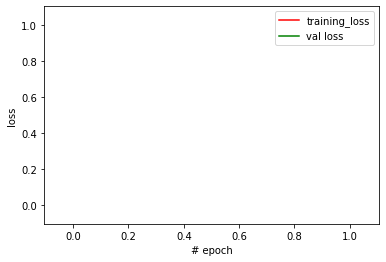

In [138]:
plt.plot(history.history['loss'],'r',label='training_loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [139]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)*100
print('r2 score:',r2)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [8]:
from keras.models import Sequential,Model
from keras.layers import Bidirectional,Dense,Dropout,Flatten
from keras.layers import Activation,MaxPooling1D
from keras.layers.convolutional import Conv1D
from keras import optimizers

input_shape=data_train.shape[1:]

parallel_kernels=[5,5,5]


for k in range(len(parallel_kernels)):
    model=Sequential()
    model.add(Conv1D(128,kernel_size=parallel_kernels[k],input_shape=data_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128,parallel_kernels[k]))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128,parallel_kernels[k]))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(units=200,return_sequences=False)))
    model.add(Dropout(0.5))
    model.add(Dense(units=1,activation='linear'))

model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse',optimizer='Adadelta')

NameError: name 'LSTM' is not defined